In [89]:
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.species, stratify = iris.species)

In [59]:
from sklearn.dummy import DummyClassifier

du = DummyClassifier()

du.fit(X_train, y_train)

du.score(X_test, y_test)

0.34210526315789475

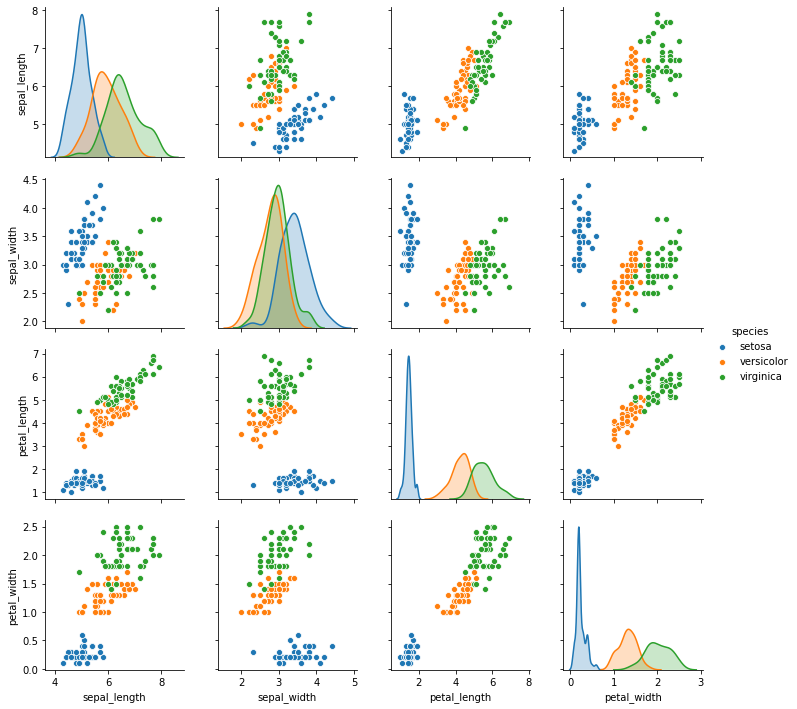

In [60]:
sns.pairplot(iris, hue = 'species')

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9736842105263158

In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9473684210526315

In [93]:
mpg = sns.load_dataset('mpg')

# Label encoding 방법
# 1)
# mpg.origin.map({'usa' : 0, 'japan' : 1, 'europe' : 2})

# 2)
# mpg.origin = mpg.origin.astype('category')
# mpg.origin.cat.codes

# One hot encoding
# 1)
# mpg.origin.str.get_dummies()

# 2)
# pd.get_dummies(mpg.origin)

In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

le = LabelEncoder()
le.fit_transform(mpg.origin)

le.inverse_transform([1]) # encoding된 값이 뭔지 알려줌

array(['japan'], dtype=object)

In [102]:
# mm = MinMaxScaler()

# mm.fit_transform(mpg[['mpg']])

In [109]:
ohe = OneHotEncoder()
ohe.fit_transform(mpg[['origin']]).toarray()

# ohe.inverse_transform([[0,0,1]])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [111]:
# !pip install sklearn-evaluation

In [113]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), iris.iloc[:, :-1], iris.species, cv=10)

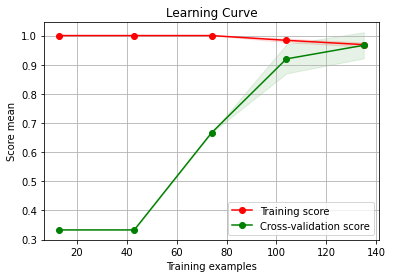

In [121]:
import sklearn_evaluation

sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [122]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [123]:
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors' : range(2,20)}, cv = 10)

grid.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(2, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [127]:
grid.best_params_, grid.best_score_

({'n_neighbors': 13}, 0.98)

In [130]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.00129676,0.00119503,0.00100164,0.00109911,0.00110164,0.00119643,0.00109735,0.00109756,0.0012958,0.00109601,0.00119691,0.00149543,0.00119662,0.00119505,0.00119607,0.00110018,0.00119591,0.00109768
std_fit_time,0.000638355,0.000400136,1.13211e-05,0.00029811,0.000310383,0.000398145,0.000291351,0.000298791,0.000456543,0.000297,0.000398557,0.000499049,0.000398526,0.000400321,0.000399333,0.000296862,0.000398707,0.000297715
mean_score_time,0.00159872,0.00129821,0.00129223,0.00129089,0.00129211,0.00139852,0.00129049,0.00139587,0.00129747,0.00129728,0.00129743,0.0209434,0.00119369,0.0012985,0.00129435,0.00139782,0.00119767,0.00129573
std_score_time,0.000663743,0.000455097,0.000450649,0.000460185,0.000459906,0.000667292,0.000446941,0.000488826,0.000456124,0.00045678,0.000456261,0.0585083,0.000399578,0.000457173,0.000459561,0.000488205,0.000398474,0.000456802
param_n_neighbors,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
params,{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},{'n_neighbors': 11},{'n_neighbors': 12},{'n_neighbors': 13},{'n_neighbors': 14},{'n_neighbors': 15},{'n_neighbors': 16},{'n_neighbors': 17},{'n_neighbors': 18},{'n_neighbors': 19}
split0_test_score,1,1,1,1,1,1,1,1,1,1,1,1,1,0.933333,1,0.933333,1,0.933333
split1_test_score,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
split2_test_score,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
split3_test_score,0.933333,0.933333,0.933333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
from sklearn.pipeline import Pipeline